## Churn classification

In [40]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
data = pd.read_csv('data/telecom_churn.csv')

### Scikit baseline model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.compose import ColumnTransformer

In [4]:
# name list
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

# list of classifiers
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [67]:
def predictor_train(X, y,name,alg):
    """_summary_

    Args:
        X (_type_): _description_
        y (_type_): _description_
        name (_type_): _description_
        alg (_type_): _description_

    Returns:
        _type_: _description_
    """
    ct = ColumnTransformer([
    ('binary data', OneHotEncoder(), [1,2]),
    ('standard', StandardScaler(), [0,3,4,5,6,7,8,9])],
    remainder = 'passthrough')

    pipe = Pipeline(steps=[('columntrans', ct),(name, alg)])
    pipe.fit(X, y)
    return pipe


def score(X,y,name,alg):
    """_summary_

    Args:
        X (_type_): _description_
        y (_type_): _description_
        name (_type_): _description_
        alg (_type_): _description_

    Returns:
        _type_: _description_
    """
    return [name , alg.score(X,y)]


def predict(X, y, name, alg):
    """_summary_

    Args:
        X (_type_): _description_
        y (_type_): _description_
        name (_type_): _description_
        alg (_type_): _description_

    Returns:
        _type_: _description_
    """
    predictions = alg.predict(X)
    return [name, predictions]

In [66]:
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [45]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:].values, data.Churn, test_size=0.2, random_state=42)

In [78]:
x_train.shape , x_test.shape

((2666, 10), (667, 10))

In [79]:
y_train.shape , y_test.shape

((2666,), (667,))

In [104]:
trained_alg = []
scores = []
predictions = []

In [105]:
for name, clf in zip(names, classifiers):
    trained_alg.append([name, predictor_train(x_train, y_train, name , clf)])

e:\anaconda\envs\data_science\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [106]:
trained_alg

[['Nearest Neighbors',
  Pipeline(steps=[('columntrans',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('binary data',
                                                    OneHotEncoder(), [1, 2]),
                                                   ('standard', StandardScaler(),
                                                    [0, 3, 4, 5, 6, 7, 8, 9])])),
                  ('Nearest Neighbors', KNeighborsClassifier(n_neighbors=3))])],
 ['Linear SVM',
  Pipeline(steps=[('columntrans',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('binary data',
                                                    OneHotEncoder(), [1, 2]),
                                                   ('standard', StandardScaler(),
                                                    [0, 3, 4, 5, 6, 7, 8, 9])])),
                  ('Linear SVM', SVC(C=0.025, kernel='linear'))])],
 [

In [107]:
for name, clf in trained_alg:
    scores.append(score(x_test, y_test, name, clf))

In [108]:
scores

[['Nearest Neighbors', 0.8920539730134932],
 ['Linear SVM', 0.848575712143928],
 ['RBF SVM', 0.856071964017991],
 ['Gaussian Process', 0.9340329835082459],
 ['Decision Tree', 0.9115442278860569],
 ['Random Forest', 0.8785607196401799],
 ['Neural Net', 0.9175412293853074],
 ['AdaBoost', 0.896551724137931],
 ['Naive Bayes', 0.8365817091454273],
 ['QDA', 0.7466266866566716]]

In [109]:
for name, clf in trained_alg:
    predictions.append([name, predict(x_test, y_test, name, clf)])

In [110]:
predictions[:1]

[['Nearest Neighbors',
  ['Nearest Neighbors',
   array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
          0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
          0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0

### Visualize the baseline model

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

In [111]:
[i[0] for i in scores]

['Nearest Neighbors',
 'Linear SVM',
 'RBF SVM',
 'Gaussian Process',
 'Decision Tree',
 'Random Forest',
 'Neural Net',
 'AdaBoost',
 'Naive Bayes',
 'QDA']

In [112]:
[i[1] for i in scores]

[0.8920539730134932,
 0.848575712143928,
 0.856071964017991,
 0.9340329835082459,
 0.9115442278860569,
 0.8785607196401799,
 0.9175412293853074,
 0.896551724137931,
 0.8365817091454273,
 0.7466266866566716]

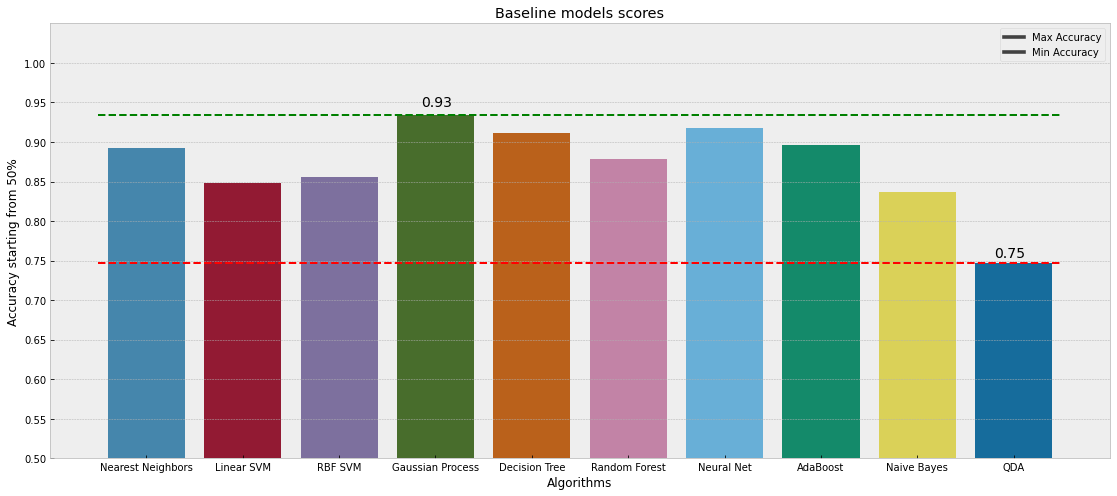

In [168]:
plt.figure(figsize=(19,8))
sns.barplot(x=[i[0] for i in scores], y=[i[1] for i in scores])
plt.ylim(0.5, 1.05)
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.ylabel('Accuracy starting from 50%')
plt.xlabel('Algorithms')
plt.hlines(y=np.max([i[1] for i in scores]), xmin=-0.5, xmax=9.5, colors='g', linestyles='dashed')
plt.text(2.85, 0.95, round(np.max([i[1] for i in scores]),2) , ha='left', va='center', fontsize = 14)
plt.hlines(y=np.min([i[1] for i in scores]), xmin=-0.5, xmax=9.5, colors='r', linestyles='dashed')
plt.text(8.8, 0.76, round(np.min([i[1] for i in scores]),2), ha='left', va='center', fontsize = 14)
plt.legend(['Max Accuracy', 'Min Accuracy'])
plt.title('Baseline models scores');

### Gaussian Process  

### Decission Tree